**Extracting the dataset**


In [1]:
import zipfile

zip_path = "/content/drive/MyDrive/stuff/catsvdogs.zip"
extract_to = "/content/dataset"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

**Imports**


In [26]:
import pandas as pd
import keras
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense , Flatten

**Preprocessing and Validation on Image**

In [3]:
X_train = np.loadtxt('/content/dataset/input.csv',delimiter=',')
Y_train = np.loadtxt('/content/dataset/labels.csv',delimiter=',')

X_test = np.loadtxt('/content/dataset/input_test.csv',delimiter=',')
Y_test = np.loadtxt('/content/dataset/labels_test.csv',delimiter=',')

In [4]:
print("original shape of X_train : ", X_train.shape)
print("original shape of Y_train : ", Y_train.shape)
print("original shape of X_test : ", X_test.shape)
print("original shape of Y_test : ", Y_test.shape)

original shape of X_train :  (2000, 30000)
original shape of Y_train :  (2000,)
original shape of X_test :  (400, 30000)
original shape of Y_test :  (400,)


In [10]:
# Here we can see that we have to reshape these images and also remove the
# nothing from Y_train

reshaping the images



In [5]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)


In [6]:
print(" shape of X_train : ", X_train.shape)
print(" shape of Y_train : ", Y_train.shape)
print(" shape of X_test : ", X_test.shape)
print(" shape of Y_test : ", Y_test.shape)

 shape of X_train :  (2000, 100, 100, 3)
 shape of Y_train :  (2000, 1)
 shape of X_test :  (400, 100, 100, 3)
 shape of Y_test :  (400, 1)


In [7]:
X_train[1,:]

array([[[131., 128., 135.],
        [160., 157., 164.],
        [198., 192., 204.],
        ...,
        [250., 249., 247.],
        [255., 255., 253.],
        [250., 249., 245.]],

       [[140., 137., 144.],
        [127., 124., 131.],
        [120., 114., 124.],
        ...,
        [251., 253., 252.],
        [254., 255., 253.],
        [254., 255., 251.]],

       [[204., 202., 207.],
        [187., 185., 190.],
        [147., 142., 148.],
        ...,
        [249., 255., 255.],
        [238., 247., 242.],
        [232., 241., 236.]],

       ...,

       [[174., 182., 195.],
        [172., 180., 193.],
        [178., 186., 197.],
        ...,
        [ 87., 114.,  97.],
        [ 75.,  99.,  83.],
        [ 80., 105.,  86.]],

       [[166., 173., 189.],
        [164., 172., 185.],
        [172., 180., 193.],
        ...,
        [ 78., 106.,  84.],
        [ 72.,  97.,  76.],
        [ 77., 102.,  81.]],

       [[173., 180., 196.],
        [172., 179., 195.],
        [174., 1

In [8]:
# thus we need to rescale these values to train our model as these ranges from
# 0-255 which are typical rgb values so we divide them by 255.

X_train = X_train/255
X_test = X_test/255

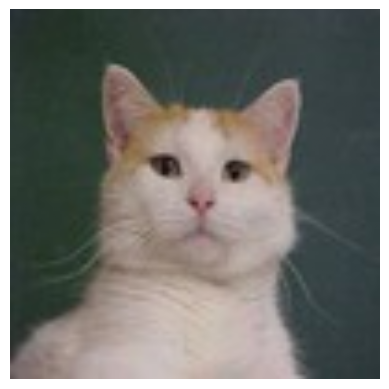

In [12]:
idx = random.randint(0,len(X_train))
plt.imshow(X_train[idx], interpolation='bilinear')
plt.axis('off')
plt.show()

# **Model** **Training**

In [13]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(X_train,Y_train,epochs=20, batch_size = 32)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.4854 - loss: 0.7259
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5222 - loss: 0.6896
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6252 - loss: 0.6544
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6600 - loss: 0.6305
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7079 - loss: 0.5637
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7481 - loss: 0.5217
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7803 - loss: 0.4562
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8065 - loss: 0.4347
Epoch 9/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8552 - loss: 0.3457
Epoch 10/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8743 - loss: 0.2930
Epoch 11/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8782 - loss: 0.2908
Epoch 12/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy:

In [16]:
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7143 - loss: 1.5112


[1.4920848608016968, 0.7099999785423279]

# Evaluation Metrics


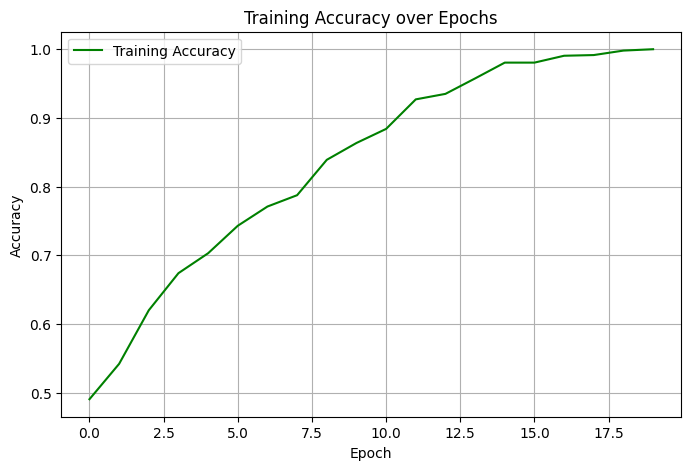

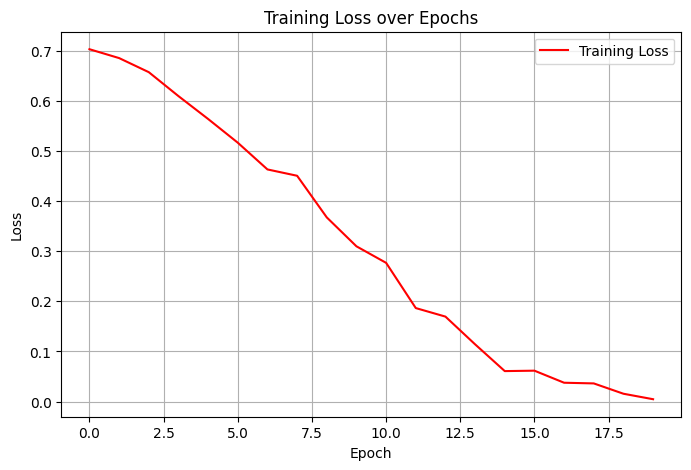

In [17]:
# Plot Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='green')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Predictions


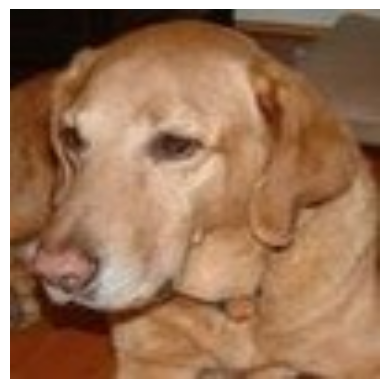

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
this image belongs to class Dog


In [23]:
idx2 = random.randint(0,len(Y_test))
plt.imshow(X_test[idx2,:], interpolation='bilinear')
plt.axis('off')
plt.show()

y_pred = model.predict(X_test[idx2,:].reshape(1,100,100,3))
y_pred = y_pred > 0.5

if (y_pred==0):
  print("this image belongs to class Dog")
else:
  print("this image belongs to class Cat")

In [30]:
model.save('cat_dog_classifier.h5')